In [1]:
### Install Qiskit and relevant packages, if needed

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_ibm_runtime
!pip install qiskit_aer
!pip install graphviz
!pip install qiskit-transpiler-service
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git
!pip install qiskit-code-assistant-jupyterlab

   ---------------------------------------- 0.0/524.0 kB ? eta -:--:--
   -------------- ------------------------- 194.6/524.0 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 524.0/524.0 kB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/144.5 kB ? eta -:--:--
   ---------------------------------------- 144.5/144.5 kB 8.4 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to c:\users\abuka\appdata\local\temp\pip-req-build-lc3lgekw


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [2]:
%set_env QXToken=2dad4afe8e00693c1664e830bbdbf68510cdceddb8b56a140dd35ce0947602494fc318c40bb3502263bf05cfa9f155d28af55d635737f4bff028b3b593a46042

env: QXToken=2dad4afe8e00693c1664e830bbdbf68510cdceddb8b56a140dd35ce0947602494fc318c40bb3502263bf05cfa9f155d28af55d635737f4bff028b3b593a46042


**Exercise 1:**

Write a prompt for the Qiskit Code Assistant to generate a 3 qubit GHZ circuit.

Note:

There is no grader for this exercise. Please feel free to experiment and have fun with the tool!

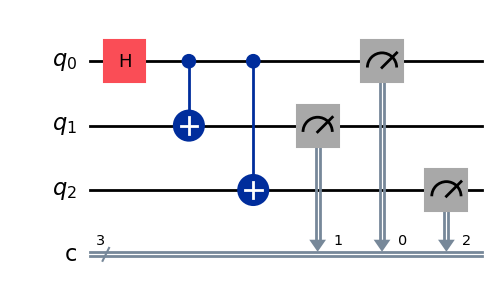

In [5]:
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply CNOT gates
qc.cx(0, 1)
qc.cx(0, 2)

# Measure the qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Draw the circuit
qc.draw('mpl')

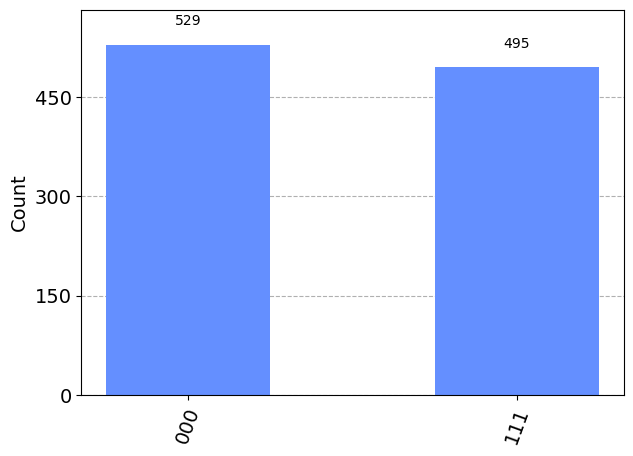

In [11]:
backend=AerSimulator(method='statevector')
job = transpile(qc, backend)
# Run and get counts
result = backend.run(job).result()
counts = result.get_counts(qc)
plot_histogram(counts)

**Exercise 2:**

Write a prompt for the Qiskit Code Assistant to design a 2 qubit CH gate with only CX and RY gate.

Note:

There is no grader for this exercise. Please feel free to experiment and have fun with the tool!

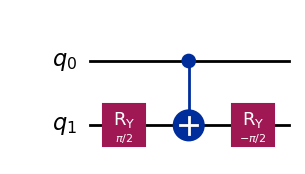

In [16]:
from qiskit import QuantumCircuit

def ch(qc, ctrl, target):
  """
  Applies a Controlled Hadamard (CH) gate to the given qubits.

  Args:
      qc (QuantumCircuit): The quantum circuit to add the gate.
      ctrl (int): The control qubit index.
      target (int): The target qubit index.
  """
  # Apply an RY gate with angle pi/2 to the target qubit
  qc.ry(np.pi/2, target)

  # Apply a CNOT gate with control and target qubits
  qc.cx(ctrl, target)

  # Apply another RY gate with angle -pi/2 to the target qubit
  qc.ry(-np.pi/2, target)

# Example usage
qc = QuantumCircuit(2)
ch(qc, 0, 1)
qc.draw('mpl')  # View the circuit diagram


**Bonus Exercise!**

How can we create a prompt for the Qiskit Code Assistant to generate a quantum circuit that produces a q-sphere resembling the Qiskit logo?

Try experimenting with the Qiskit Code Assistant and share your successful prompt on Discord!

**Bonus Tip:**

The Qiskit logo utilizes a specific statevector for a 6-qubit system. Researching this statevector might provide valuable clues for crafting your prompt!

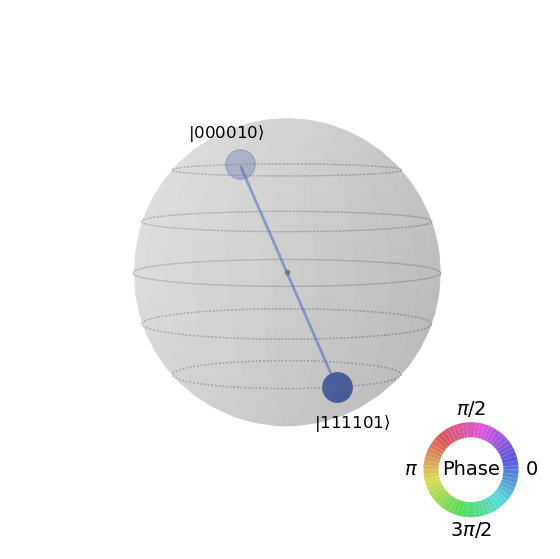

In [18]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

state = [0] * 64  # Initialize with all zeros
state[2] = 1  # Set amplitude for basis state |010000>
state[61] = 1  # Set amplitude for basis state |111101>

# Create a quantum circuit (circuit doesn't directly replicate logo creation)
qc = QuantumCircuit(6)

# You can modify this part to explore different gate combinations
# This example applies Hadamard (H) to qubit 0 and CNOT (CX) gates for entanglement
qc.h(0)
for i in range(5):
  qc.cx(0, i+1)
qc.x(1)

# Visualize the statevector as a q-sphere
plot_state_qsphere(state, show_state_labels=True)
